데이터셋에 있는 특성들

생존 여부(Survival)	0 = 죽음, 1 = 생존
<br>
티켓 종류(pclass)   1 = 1등석, 2 = 2등석, 3 = 3등석
<br>
이름(Name)	승객의 이름
<br>
성(Sex)	남성, 여성
<br>
나이(Age)   승객의 나이
<br>
sibsp	함께 탑승한 형제 또는 배우자의 수 
<br>
parch	함께 탑승한 부모 또는 자녀 수
<br>
티켓(Ticket)	티켓 번호(A/4 48871, 330911 등)
<br>
비용(fare)	티켓 요금(7.8292 등)
<br>
객실(cabin)	객실 번호(B45 등)
<br>
탑승한 항구(embarked) C = Cherbourg, Q = Queenstown, S = Southampton
<br>

### 1 - 라이브러리 추가 + 파일 불러오기

In [1]:
%matplotlib inline
import numpy as np # 넘파이
import matplotlib.pyplot as plt # 매트플롯립
import pandas as pd # 판다스(csv)

# 결측치 시각화
import seaborn as sns # 맷플롯립에 기반을 둔 파이썬 데이터 시각화 라이브러리
import missingno as msno #

from sklearn.model_selection import train_test_split # 훈련셋-테스트셋 나누기
from category_encoders import TargetEncoder
from sklearn.preprocessing import LabelEncoder

In [2]:
# 훈련셋, 테스트셋 불러오기
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
print(train.shape, test.shape)

(891, 12) (418, 11)


In [3]:
train # 훈련셋 정보

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [15]:
train.info() # 데이터의 간결한 요약본 출력

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
train.describe() # 데이터에 대한 각종 통계를 요약해서 출력

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 2 - Exploratory Data Analysis(탐색적 자료 분석, 데이터를 분석하기 전에 그래프나 통계적인 방법으로 자료를 직관적으로 바라보는 과정)

In [3]:
data = [train, test] # 리스트 생성

1 - I want to count how many missing value consist our train & test sets.
<br>
2 - I will build a correlation matrix.
<br>
3 - I want to divide my columns to numerical and categorical, then consider them.
<br>
4 - I want to see more about my features.


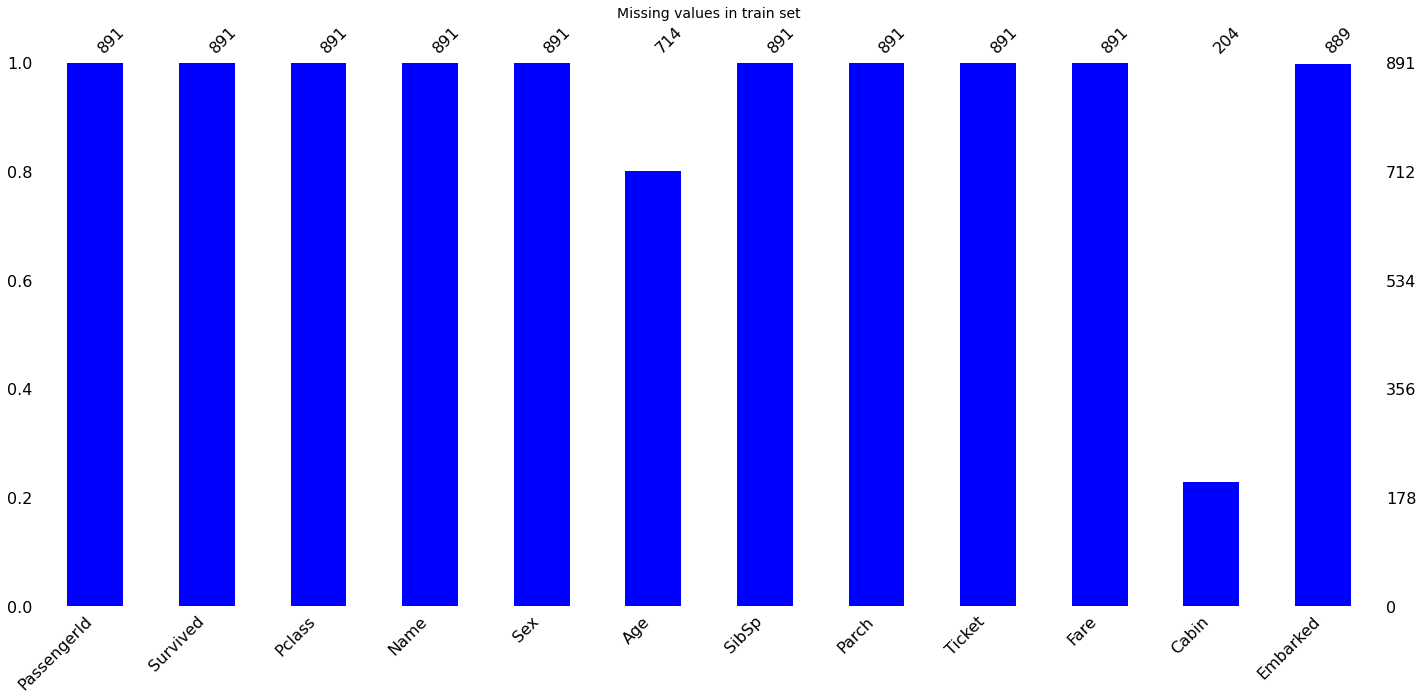

In [13]:
# 결측치(값이 없는 데이터)가 얼마나 있는가?
# 각 특성 별로 값이 있는 횟수 카운트 -> 어떤 특성을 이용하면 좋을지 알아볼 수 있음
msno.bar(train, color='blue')
plt.title('Missing values in train set', fontsize=14)
plt.show()

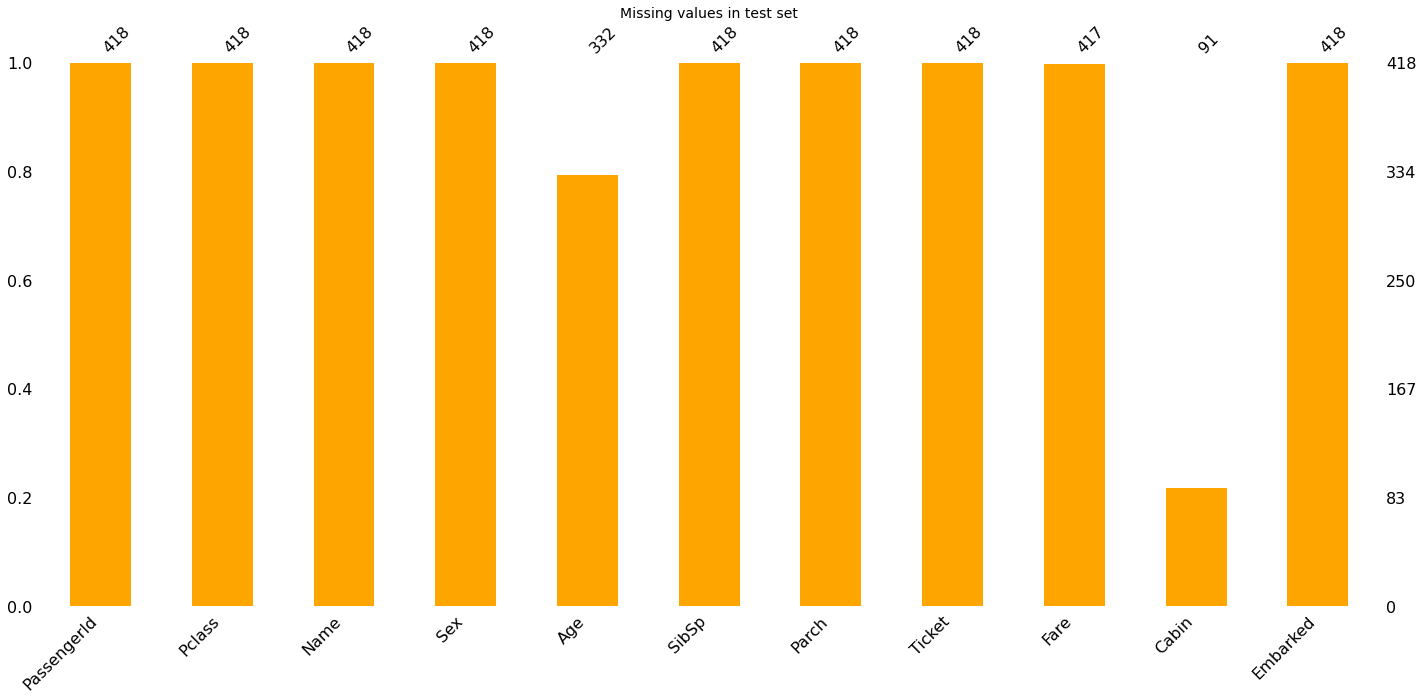

In [14]:
# 테스트셋에 대한 결측치 관찰(앞서 했던 것처럼 값이 있는 횟수를 카운트)
msno.bar(test, color='orange')
plt.title('Missing values in test set', fontsize=14)
plt.show()

# 훈련 데이터셋, 테스트 데이터셋 모두 나이와 객실 번호에 대한 정보가 부족하며 나머지 정보는 거의 다 존재(없어봐야 1~2개)한다는 것을 알 수 있다

In [5]:
train.corr() # 결측치 빼고 두 변수간 상관계수를 계산(1에 가까울수록 방향이 같은 선형 관계고 0이면 선형 관계가 없고 -1에 가까울수록 서로 반대 방향의 선형 관계라는 뜻)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


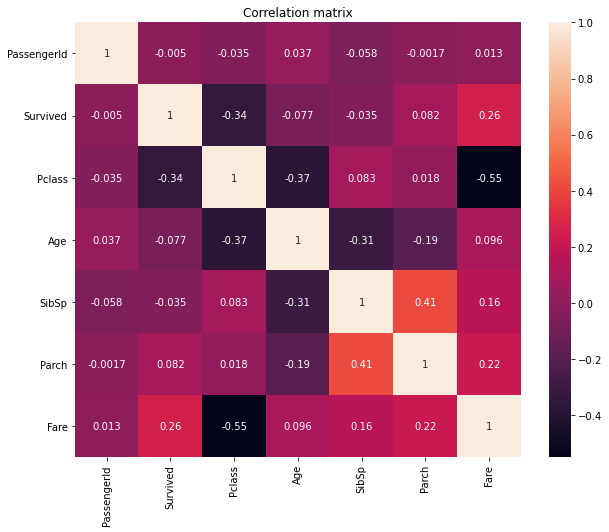

In [19]:
sns.heatmap(train.corr(), annot=True) # 위에서 표현한 두 변수간 상관관계를 히트맵으로 표현(가독성 증가)
plt.title('Correlation matrix', fontsize=15)
fig=plt.gcf() # 현재 표시되는 객체에 대한 정보 휙득(히트맵)
fig.set_size_inches(10,8) # 크기 조절
plt.show() # 보여주기

데이터를 통해 알 수 있는 정보

1. Sibsp과 Parch가 연관성이 높다. Sibsp는 '함께 탑승한 형제 또는 배우자의 수'고 Parch는 '함께 탑승한 부모 또는 자녀의 수'인데 이 둘의 연관성이 높다는 것은 부부가 여행을 갈 때 자식도 동행하는 케이스가 많다는 뜻이다.
2. Survived와 Pclass가 연관성이 높다. Pclass는 1,2,3값이 있는데 이는 1등석, 2등석, 3등석을 의미하며 서로 상관계수가 반대라는 의미는 Pclass의 값이 작을수록 Survived가 1에 가까워진다는 뜻이므로 1등석에 있던 승객들이 2, 3등석에 있는 승객들보다 더 많이 생존했다는 사실을 알 수 있다. 
3. Survived와 Fare도 연관성이 높다. Fare는 요금을 뜻하는데 Survived와 상관계수가 양수라는 뜻은 요금을 많이 낸 승객들이 생존했던 확률이 높다는 의미로 해석할 수 있다. 
그리고 Pclass와 Fare의 상관관계가 -0.55라는 사실로 보아 높은 요금을 낸 승객들이 1등석에 해당하는 높은 클래스의 좌석을 차지했고 이들이 많이 살아남았다는 사실을 알 수 있다. 
4. 그리고 Age와 pclass가 음수 상관관계를 보여주고 있다. 나이가 많은 사람일 수록 더 높은 좌석을 차지한다는 경향이 보이는데 surviveds와는 상관계수가 낮다는 걸 보아 나이와 생존 여부는 큰 관계가 없음을 알 수 있다. 
5. Survived와 높은 상관계수를 보이는 항목은 pclass, fare 두개 뿐이고 나머지 항목들은 0에 가까운 상관계수를 보여주고 있다. 즉, 생존여부와 큰 연관성을 보여주는 특징은 '좌석 등급'과 '요금'이라는 것이다. 

In [6]:
# 데이터 종류별로 분석
df_num = train[['Age', 'SibSp', 'Parch', 'Fare', 'Survived', 'Pclass']] # 숫자로 분류하는 데이터
df_cat = train[['Sex', 'Ticket', 'Cabin', 'Embarked']] # '남성, 여성' 등 항목으로 분류하는 데이터

In [24]:
# 탑승 승객들을 각 특성별로 분석
def hist_distr(data):
    for i in data.columns: # 각 특성들에 대해 for문
        plt.hist(data[i], color = 'blue') # 히스토그램
        plt.title(i)
        plt.show()

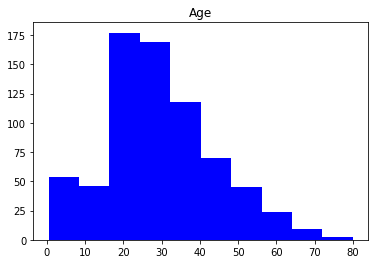

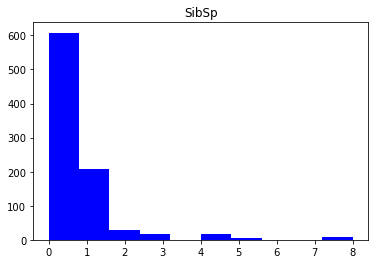

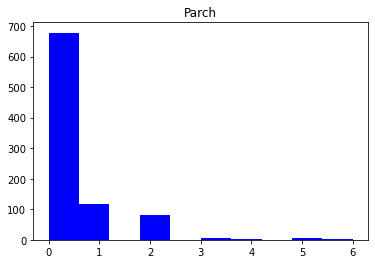

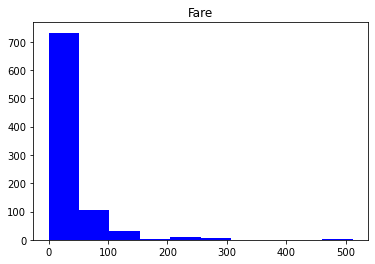

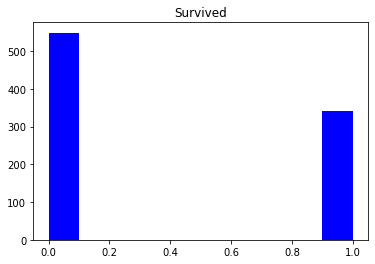

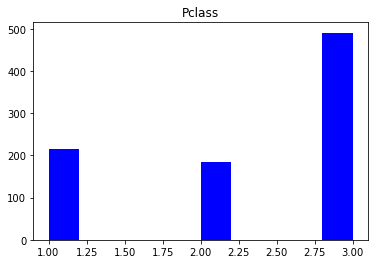

In [25]:
hist_distr(df_num) # 우선 숫자 데이터부터

데이터가 한 곳에 모여있는 경우가 별로 없다는 사실을 알 수 있다. 추후 이들을 이용해 학습을 시키면 좋은 성능의 모델이 나오기 힘들지 않을까 싶다.

In [26]:
# 나이 기준으로 항목별 분류 데이터 확인
def cat_plot(data):
    for i in data.columns:
        sns.barplot(x = data[i], y = df_num.Age) # x축은 데이터, y축은 나이
        plt.title(i)
        plt.show()    

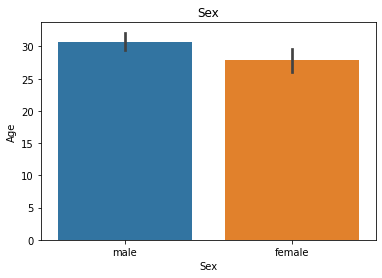

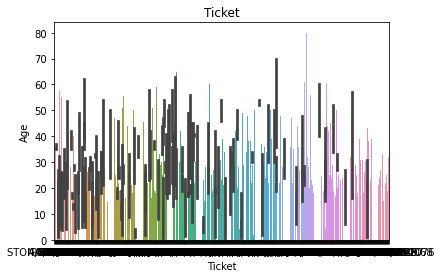

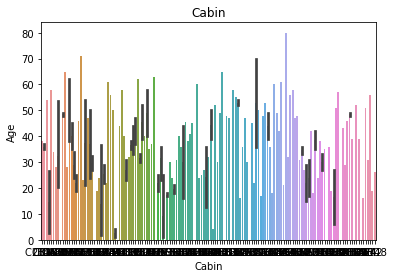

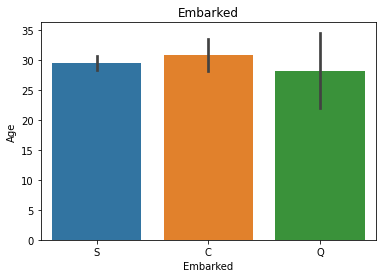

In [27]:
cat_plot(df_cat)

'나이' 데이터가 부족하다(결측값이 많다)
<br>
그래서 얘를 채워야한다. 채우는 기준을 찾아한다. 

In [28]:
train.iloc[:, [2, 3, 5]][:5]

,Pclass,Name,Age
0,3,"Braund, Mr. Owen Harris",22.0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0
2,3,"Heikkinen, Miss. Laina",26.0
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0
4,3,"Allen, Mr. William Henry",35.0


We have miss value in Embarked feaure, let's try to define it's value.

In [7]:
train[train['Embarked'].isna()] # isna() : 결측값을 확인해 결측값이 맞으면 True, 결측값이 아니면 False를 반환. 이 경우는 Embarked가 NaN인 데이터만 반환한다. 
# 앞서 Embarkd가 891개에서 2개 부족한 889개의 데이터가 있음을 확인했고 어느 샘플에서 그 값이 NaN인지 확인해보는 구문이라고 볼 수 있다.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

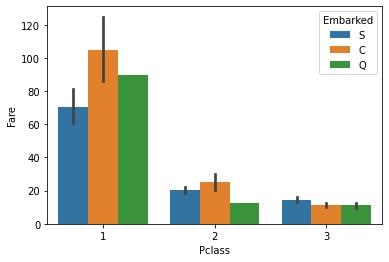

In [31]:
sns.barplot(x=train['Pclass'], y=train['Fare'], hue=train['Embarked']) # x축은 좌석 등급, y축은 요금
# 어디서 출발했냐에 따라 같은 등급의 좌석이여도 요금이 다르다.

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

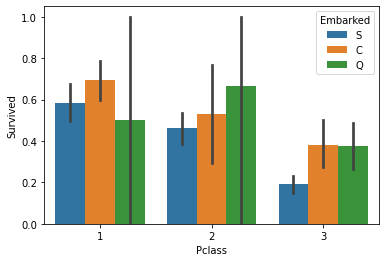

In [32]:
sns.barplot(x=train['Pclass'], y=train['Survived'], hue=train['Embarked']) # x축은 좌석 등급, y축은 생존 평균값
# 각 등급의 좌석마다 생존값이 가장 높은 출발지가 다른걸로 보아 출발지랑 생존 확률은 큰 관계가 없다는 결론을 내릴 수 있다 

In [8]:
# 출발지가 'S'인 승객들을 객실 등급별로 카운트
train[train['Embarked']=='S']['Pclass'].value_counts()

3    353
2    164
1    127
Name: Pclass, dtype: int64

In [9]:
# 출발지가 'C'인 승객들을 객실 등급별로 카운트
train[train['Embarked']=='C']['Pclass'].value_counts()

1    85
3    66
2    17
Name: Pclass, dtype: int64

In [10]:
# 출발지가 'Q'인 승객들을 객실 등급별로 카운트
train[train['Embarked']=='Q']['Pclass'].value_counts()

3    72
2     3
1     2
Name: Pclass, dtype: int64

'S'에서 대부분의 1등 승객들이 탑승했다. S에서 출발하는 1등급 객실이 1등급 객실 중 가장 저렴한 것과 S에서 1등급 객실에 탑승한 손님이 가장 많다는 것이 어떠한 상관관계를 만들어내는가 싶다. 
그런데 생존에는 별다른 선형 관계가 없어보인다. 

그냥 전체적으로 S에서 많이들 탔다. 

In [38]:
for d in data:
    d['Cabin'] = d['Cabin'].str[0]

<AxesSubplot:>

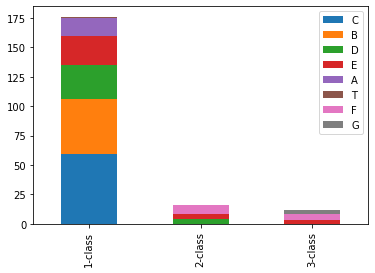

In [37]:
# 객실 등급에 대해 객실 종류(C, D, ...)별로 카운트
Pclass1 = train[train['Pclass'] == 1]['Cabin'].value_counts()
Pclass2 = train[train['Pclass'] == 2]['Cabin'].value_counts()
Pclass3 = train[train['Pclass'] == 3]['Cabin'].value_counts()

cabin_df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
cabin_df.index = ['1-class', '2-class', '3-class']
cabin_df.plot(kind='bar', stacked=True)

We will fill missing values according passengers class.

### 3 - Feature Engineering(데이터의 특징-이름, 성별 등을 만들어내는 일)

In [4]:
for d in data:
    d['Title'] = d['Name'].str.extract(' ([A-Za-z]+)\.', expand=True) # 각 열의 'Name' 특성에서 정규표현식 ([A-Za-z]+)\.에 해당하는 부분만 추출 후 'Title'항목에 담음

In [5]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Mme           1
Lady          1
Jonkheer      1
Don           1
Sir           1
Ms            1
Capt          1
Countess      1
Name: Title, dtype: int64

In [6]:
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Dona        1
Dr          1
Ms          1
Name: Title, dtype: int64

I'll use only first three titles

In [7]:
titles = {
    "Mr": 0, "Miss": 1, "Mrs": 2, "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,
    "Countess": 3, "Lady": 3, "Mme": 3, "Ms": 3, "Sir": 3,  "Capt": 3, "Don": 3, "Dona": 3, "Jonkheer": 3 # 0, 1, 2에 해당하는 값들만 사용
} # 딕셔너리 생성

for d in data:
    d['Title'] = d['Title'].map(titles) # Title에 해당하는 문자열을 titles딕셔너리에 해당하는 값으로 바꿔서 넣음(Mr -> 0, Miss ->1, Mrs->2, Master->3,...)

In [8]:
train[:12] # 위에서 12개

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,3
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,2


In [9]:
test[:12]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S,0
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q,1
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S,0
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C,2
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S,0


Now we have 4 type of title and we can group age by PClass and Title to get avarage age.

In [10]:
# 결측값 채우기(Age). Pclass, Title기준으로 그룹 집계를 한 뒤 [Age]의 평균값을 결측치로 넣음
train['Age'].fillna( train.groupby(["Pclass", "Title"])["Age"].transform("mean"), inplace=True)
test['Age'].fillna( test.groupby(["Pclass", "Title"])["Age"].transform("mean"), inplace=True)

In [12]:
train[:12] # index=6의 28.72491이 Pclass=3, Title=0에 해당하는 사람들의 평균 나이인 것

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,0
5,6,0,3,"Moran, Mr. James",male,28.724891,0,0,330877,8.4583,NaN,Q,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S,3
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,NaN,S,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,NaN,C,2


In [11]:
test[:12]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.500000,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.000000,1,0,363272,7.0000,NaN,S,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.000000,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.000000,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.000000,1,1,3101298,12.2875,NaN,S,2
5,897,3,"Svensson, Mr. Johan Cervin",male,14.000000,0,0,7538,9.2250,NaN,S,0
6,898,3,"Connolly, Miss. Kate",female,30.000000,0,0,330972,7.6292,NaN,Q,1
7,899,2,"Caldwell, Mr. Albert Francis",male,26.000000,1,1,248738,29.0000,NaN,S,0
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.000000,0,0,2657,7.2292,NaN,C,2
9,901,3,"Davies, Mr. John Samuel",male,21.000000,2,0,A/4 48871,24.1500,NaN,S,0


In [13]:
# 훈련에 필요없다고 생각되는 항목들을 제거한다
to_drop = ['PassengerId', 'Name']
train.drop(to_drop, axis=1, inplace=True)
test.drop("Name", axis=1, inplace=True)

In [14]:
train[:12] # 'PassengerId', 'Name'가 사라지고 Title만 남아있다. 
# Name으로 Title을 만들고 Title과 Pclass를 이용해 Age 결측치 값을 채웠다. 결측치 값을 채우기 위해 Name을 사용하고 사용한 뒤 필요 없어졌으니까 버린 것

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,0,3,male,22.000000,1,0,A/5 21171,7.2500,NaN,S,0
1,1,1,female,38.000000,1,0,PC 17599,71.2833,C85,C,2
2,1,3,female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,1,1,female,35.000000,1,0,113803,53.1000,C123,S,2
4,0,3,male,35.000000,0,0,373450,8.0500,NaN,S,0
5,0,3,male,28.724891,0,0,330877,8.4583,NaN,Q,0
6,0,1,male,54.000000,0,0,17463,51.8625,E46,S,0
7,0,3,male,2.000000,3,1,349909,21.0750,NaN,S,3
8,1,3,female,27.000000,0,2,347742,11.1333,NaN,S,2
9,1,2,female,14.000000,1,0,237736,30.0708,NaN,C,2


In [15]:
test[:12] # Name만 버렸다. PassengerId는 어떠한 결측치 값을 채우기 위해 남겨놓은 것 같다. 

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,male,34.500000,0,0,330911,7.8292,NaN,Q,0
1,893,3,female,47.000000,1,0,363272,7.0000,NaN,S,2
2,894,2,male,62.000000,0,0,240276,9.6875,NaN,Q,0
3,895,3,male,27.000000,0,0,315154,8.6625,NaN,S,0
4,896,3,female,22.000000,1,1,3101298,12.2875,NaN,S,2
5,897,3,male,14.000000,0,0,7538,9.2250,NaN,S,0
6,898,3,female,30.000000,0,0,330972,7.6292,NaN,Q,1
7,899,2,male,26.000000,1,1,248738,29.0000,NaN,S,0
8,900,3,female,18.000000,0,0,2657,7.2292,NaN,C,2
9,901,3,male,21.000000,2,0,A/4 48871,24.1500,NaN,S,0


In [16]:
# 나이를 숫자에서 항목(어림, 젊음, 중년, 노년)으로 바꾼다. 
def age_enc(data):
    for i in range(len(data)):
        if data.Age[i] < 18:
            data['Age'][i] = 'Under_18'
            continue
        if (data.Age[i] > 18) & (data.Age[i] < 38): 
            data['Age'][i] = 'Young'
            continue
        if (data.Age[i] > 38) & (data.Age[i] < 60): 
            data['Age'][i] = 'Middle'
            continue
        else:
            data['Age'][i] = 'Old'
            continue

In [17]:
age_enc(train)

In [18]:
age_enc(test)

As we remember our train set also have missing values in Cabin and Embarked Features, let's start from Embarked.

In [19]:
# 아직 못채운 결측치들을 채우기

train['Embarked'].fillna('S', inplace=True) # S에서 대부분 승객들이 탑승했으므로 S로 채움

In [20]:
train[:30]

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,0,3,male,Young,1,0,A/5 21171,7.2500,NaN,S,0
1,1,1,female,Old,1,0,PC 17599,71.2833,C85,C,2
2,1,3,female,Young,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,1,1,female,Young,1,0,113803,53.1000,C123,S,2
4,0,3,male,Young,0,0,373450,8.0500,NaN,S,0
5,0,3,male,Young,0,0,330877,8.4583,NaN,Q,0
6,0,1,male,Middle,0,0,17463,51.8625,E46,S,0
7,0,3,male,Under_18,3,1,349909,21.0750,NaN,S,3
8,1,3,female,Young,0,2,347742,11.1333,NaN,S,2
9,1,2,female,Under_18,1,0,237736,30.0708,NaN,C,2


Why 'S'? We discussed it above. Now let's fill Cabin.

Now turn for Cabin feature.

In [21]:
# mode() : 최빈값 추출.
# 각 객실 등급에 대해 Cabin의 최빈값을 얻어냄
first_class_train = train[train['Pclass'] == 1]['Cabin'].mode()[0] # 최빈값으로 'B96 B98'랑 'C23 C25 C27'가 나오는데 index=0에 해당하는 'B96 B98'를 넣음
second_class_train = train[train['Pclass'] == 2]['Cabin'].mode()[0]
third_class_train = train[train['Pclass'] == 3]['Cabin'].mode()[0]

first_class_test = test[test['Pclass'] == 1]['Cabin'].mode()[0]
second_class_test = test[test['Pclass'] == 2]['Cabin'].mode()[0]
third_class_test = test[test['Pclass'] == 3]['Cabin'].mode()[0]
second_class_train = train[train['Pclass'] == 2]['Cabin'].mode()[0]
third_class_train = train[train['Pclass'] == 3]['Cabin'].mode()[0]

first_class_test = test[test['Pclass'] == 1]['Cabin'].mode()[0]
second_class_test = test[test['Pclass'] == 2]['Cabin'].mode()[0]
third_class_test = test[test['Pclass'] == 3]['Cabin'].mode()[0]

In [32]:
train[train['Pclass'] == 1]['Cabin'].mode()

0        B96 B98
1    C23 C25 C27
dtype: object

In [29]:
# 결측치를 최빈값으로 보충
def fill_cabin(data):
    for i in range(len(data)):
        if (data['Pclass'][i] == 1) & (data['Cabin'][i] not in ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T']):
            data['Cabin'][i] = first_class_train
            continue
        if (data['Pclass'][i] == 2) & (data['Cabin'][i] not in ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T']):
            data['Cabin'][i] = second_class_train
            continue
        elif (data['Pclass'][i] == 3) & (data['Cabin'][i] not in ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T']):
            data['Cabin'][i] = third_class_train
            continue
            
        
def fill_cabin_test(data):
    for i in range(len(data)):
        if (data['Pclass'][i] == 1) & (data['Cabin'][i] not in ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T']):
            data['Cabin'][i] = first_class_test
            continue
        if (data['Pclass'][i] == 2) & (data['Cabin'][i] not in ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T']):
            data['Cabin'][i] = second_class_test
            continue
        elif (data['Pclass'][i] == 3) & (data['Cabin'][i] not in ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T']):
            data['Cabin'][i] = third_class_test
            continue

In [33]:
# 최빈값으로 보충
fill_cabin(train)

In [34]:
# 최빈값으로 보충
fill_cabin_test(test)

In [35]:
train['Cabin'].value_counts()

G6         491
B96 B98    215
D          184
T            1
Name: Cabin, dtype: int64

In [36]:
test['Cabin'].value_counts()

F E46              218
B57 B59 B63 B66    107
F4                  91
F                    1
D                    1
Name: Cabin, dtype: int64

In [37]:
# 결측치 카운트. 결측치가 없음을 알 수 있다
train.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
Title       0
dtype: int64

In [38]:
test.isna().sum() # Fare에 결측값이 하나 있다

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin          0
Embarked       0
Title          0
dtype: int64

We cleaned all data, last thing is Fare feature in test set, here is complicated task. I just get mean of Fare according to the Passenger class.

In [39]:
test['Fare'].fillna(test.groupby('Pclass')['Fare'].transform('mean'), inplace=True) # 좌석 등급, 요금 기준으로 평균값을 결측값에 넣어줌

We've done with data cleaning and now I want to encode it.

In [40]:
# 결측값을 다 넣었으니 이를 항목화 한다.
def fare_enc(data):
    for i in range(len(data)):
        if data.Fare[i] < 150:
            data['Fare'][i] = 'Standard'
            continue
        if (data.Fare[i] > 150) & (data.Fare[i] < 350): 
            data['Fare'][i] = 'Medium'
            continue
        if data.Fare[i] > 350: 
            data['Fare'][i] = 'Premium'
            continue

In [41]:
fare_enc(train)

In [42]:
fare_enc(test)

In [43]:
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,0,3,male,Young,1,0,A/5 21171,Standard,G6,S,0
1,1,1,female,Old,1,0,PC 17599,Standard,B96 B98,C,2
2,1,3,female,Young,0,0,STON/O2. 3101282,Standard,G6,S,1
3,1,1,female,Young,1,0,113803,Standard,B96 B98,S,2
4,0,3,male,Young,0,0,373450,Standard,G6,S,0
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,Young,0,0,211536,Standard,D,S,3
887,1,1,female,Young,0,0,112053,Standard,B96 B98,S,1
888,0,3,female,Under_18,1,2,W./C. 6607,Standard,G6,S,1
889,1,1,male,Young,0,0,111369,Standard,B96 B98,C,0


In [44]:
# 필요없는 값들 버린다
to_drop = ["Title", "Ticket", "SibSp", "Parch"]
train = train.drop(to_drop, axis=1)
test = test.drop(to_drop, axis=1)

In [45]:
train

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked
0,0,3,male,Young,Standard,G6,S
1,1,1,female,Old,Standard,B96 B98,C
2,1,3,female,Young,Standard,G6,S
3,1,1,female,Young,Standard,B96 B98,S
4,0,3,male,Young,Standard,G6,S
...,...,...,...,...,...,...,...
886,0,2,male,Young,Standard,D,S
887,1,1,female,Young,Standard,B96 B98,S
888,0,3,female,Under_18,Standard,G6,S
889,1,1,male,Young,Standard,B96 B98,C


In [46]:
# 가변수 생성(각 항목에 해당하면 1, 아니면 0으로 처리 -> 기계가 잘 이해할 수 있게 변수 가공)
df_train = pd.get_dummies(train, columns=["Age", "Cabin", "Sex", "Embarked", "Pclass", "Fare"], prefix=["Age", "Cabin", "Sex", "Embarked_from", "Pclass", "Fare"]) 
df_test = pd.get_dummies(test, columns=["Age", "Cabin", "Sex", "Embarked", "Pclass", "Fare"], prefix=["Age", "Cabin", "Sex", "Embarked_from", "Pclass", "Fare"]) 

In [47]:
df_train

,Survived,Age_Middle,Age_Old,Age_Under_18,Age_Young,Cabin_B96 B98,Cabin_D,Cabin_G6,Cabin_T,Sex_female,Sex_male,Embarked_from_C,Embarked_from_Q,Embarked_from_S,Pclass_1,Pclass_2,Pclass_3,Fare_Medium,Fare_Premium,Fare_Standard
0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1
1,1,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1
2,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1
3,1,0,0,0,1,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1
4,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1
887,1,0,0,0,1,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1
888,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1
889,1,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,0,0,1


In [48]:
# 입, 출력값 생성.
X = df_train.drop('Survived', axis=1)
y = df_train['Survived']

In [49]:
X['Cabin_T'].value_counts() # Cabin_T는 891개 중 하나만 1이고 나머지는 다 0이다. 훈련에 좋은 영향을 끼칠 데이터가 아니라 생각되어 버릴 것이다

0    890
1      1
Name: Cabin_T, dtype: int64

In [ ]:
X = X.drop("Cabin_T", axis=1)
df_test = df_test.drop("PassengerId", axis=1) # 이제야 PassengerId를 버렸다. 왜 이제서야 버린거지? 이해가 안된다. 

### 5 - Modelling

In [52]:
# 모델 가져오기
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

#### Cross Validation (K-fold)

In [53]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [55]:
k_fold = KFold(n_splits=10, shuffle=True, random_state=243) # k-fold 생성. n_splits만큼 데이터를 n등분 하고 이 중 하나를 검증 세트로 사용하는 기법

#### KNN(k-최근접 이웃 알고리즘, 분류나 회귀에 사용되는 비모수 방식)

In [56]:
clf = KNeighborsClassifier(n_neighbors = 13) # 모델 가져오기
scoring = 'accuracy'
score = cross_val_score(clf, X, y, cv=k_fold, n_jobs=1, scoring=scoring) # n등분한 데이터 중 어떤 데이터를 검증셋으로 쓰냐에 따라 정확도가 다르다는 것을 알 수 있음
print(score)

[0.84444444 0.88764045 0.76404494 0.78651685 0.87640449 0.82022472
 0.88764045 0.79775281 0.70786517 0.76404494]


In [57]:
print(f"KNN average score - {round(np.mean(score)*100, 2)}") # 각기 다른 정확도들의 평균값 구하기

KNN average score - 81.37


#### Naive Bayes(나이브 베이즈 분류, 특성들 사이의 독립을 가정하는 베이즈 정리를 적용한 확률 분류기의 일종)

In [59]:
clf = GaussianNB()
scoring = 'accuracy'
score = cross_val_score(clf, X, y, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.74444444 0.83146067 0.71910112 0.83146067 0.84269663 0.75280899
 0.78651685 0.82022472 0.64044944 0.75280899]


In [60]:
print(f"Bayes average score - {round(np.mean(score)*100, 2)}")

Bayes average score - 77.22


#### SVM(서포트 벡터 머신, 기계 학습의 분야 중 하나로 패턴 인식, 자료 분석을 위한 지도 학습 모델이며, 주로 분류와 회귀 분석을 위해 사용)

In [62]:
clf = SVC()
scoring = 'accuracy'
score = cross_val_score(clf, X, y, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.83333333 0.86516854 0.7752809  0.78651685 0.82022472 0.78651685
 0.84269663 0.78651685 0.73033708 0.7752809 ]


In [63]:
print(f"SVM average score - {round(np.mean(score)*100, 2)}")

SVM average score - 80.02


#### Decision Tree(결정 트리 학습법, 어떤 항목에 대한 관측값과 목표값을 연결시켜주는 예측 모델로써 결정 트리를 사용)

In [64]:
clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, X, y, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.82222222 0.84269663 0.78651685 0.7752809  0.83146067 0.78651685
 0.83146067 0.78651685 0.71910112 0.78651685]


In [65]:
print(f"Decision tree average score - {round(np.mean(score)*100, 2)}")

Decision tree average score - 79.68


#### Random Forest(기계 학습에서의 랜덤 포레스트는 분류, 회귀 분석 등에 사용되는 앙상블 학습 방법의 일종)

In [66]:
clf = RandomForestClassifier(n_estimators=13)
scoring = 'accuracy'
score = cross_val_score(clf, X, y, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.82222222 0.84269663 0.80898876 0.78651685 0.85393258 0.79775281
 0.84269663 0.78651685 0.74157303 0.78651685]


In [67]:
print(f"Random Forest average score - {round(np.mean(score)*100, 2)}")

Random Forest average score - 80.69


### 6 - Test

In [68]:
clf = KNeighborsClassifier(n_neighbors = 13)
clf.fit(X, y)

KNeighborsClassifier(n_neighbors=13)

In [69]:
prediction = clf.predict(df_test)

ValueError: query data dimension must match training data dimension

In [ ]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": prediction
    })

submission.to_csv('submission.csv', index=False)